In [269]:
!pip install tensorflow

In [270]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [271]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.16.1


In [272]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid")
sns.set(font_scale = 2)

from sklearn.linear_model import LogisticRegression

In [273]:
#Load the Data

In [274]:
credit_card_data= pd.read_csv('E:/Algo/Data Analytics/Fraud detection ML/creditcard.csv')

In [275]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [276]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [277]:
#Missing values in a data set
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [278]:
# Distribution of Legit transaction & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [279]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [280]:
#This Dataset is highly unbalanced

# 0 --> Normal Transaction
# 1 --> Fraudlulent Transaction

#Seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [281]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [282]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [283]:
#Combining both legit and fraud data

legit_sample = legit.sample(n=492) 
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184702,126351.0,-0.455966,0.687780,1.032364,1.129776,-0.006820,-0.549273,0.824347,-0.029079,-0.761466,0.455418,-1.506125,-1.745110,-2.770632,0.267464,-1.481342,0.480515,0.020960,-0.799338,-0.939670,-0.311345,0.111065,0.243920,-0.026184,0.455516,-0.852315,2.238266,-0.155895,0.145523,46.97,0
18614,29640.0,1.226823,0.024413,0.170418,0.188888,-0.652877,-1.530560,0.258511,-0.259927,0.131693,-0.104597,-0.110503,-0.411720,-1.514240,0.745827,0.993654,0.095065,0.002109,-0.928885,0.158844,-0.127683,-0.424055,-1.407536,0.244661,0.692830,-0.002763,0.604054,-0.115188,0.008380,32.98,0
283917,171996.0,-1.628441,0.982144,0.257413,-0.880860,0.523759,0.596353,-0.465191,-2.423119,1.066916,-0.176532,-1.729580,0.094768,0.177658,-0.278730,0.259906,0.413592,-0.824905,0.242143,0.110098,-1.017817,2.137448,-0.945153,0.675496,-0.047387,-0.910991,-0.760894,-0.065381,0.266272,9.61,0
214241,139589.0,0.926828,-1.741959,-1.397802,1.716835,-0.648898,-0.275835,0.562451,-0.206755,0.337729,0.174270,0.758584,0.960194,-0.091242,0.510998,-0.490068,0.046824,-0.643201,0.684966,-0.587000,0.795793,0.784407,1.290413,-0.562775,0.085654,0.159121,-0.320513,-0.075515,0.031935,531.14,0
15729,27160.0,-3.157716,-3.155044,-0.001490,1.189352,-4.269448,1.742988,5.974689,-0.516118,-0.651917,-2.276759,-0.790164,0.002898,0.122374,-0.150843,-1.069100,-0.038028,-0.278741,0.160836,-1.129679,3.078252,0.919084,0.188297,3.191329,0.545632,1.047035,-0.513821,-0.426225,0.208186,1499.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [284]:
data=DataFrame(new_dataset)

In [285]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [286]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [287]:
#Split the data into training and testing

In [288]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2, shuffle = True)

In [289]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [290]:
###############################--------------- Logistic Regression --------------###############################

In [291]:
#Model Training
#Logistic Regression

model = LogisticRegression()

In [292]:
#Training the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [293]:
#Model Evaluation
# Accuracy on the training data

X_train_prediction_LR = model.predict(X_train)
training_data_accuracy_LR = accuracy_score(X_train_prediction_LR, Y_train)

In [294]:
print('Accuracy on Training data: ', training_data_accuracy_LR)

Accuracy on Training data:  0.9212198221092758


In [295]:
# Accuracy on the test data

X_test_prediction_LR = model.predict(X_test)
test_data_accuracy_LR = accuracy_score(X_test_prediction_LR, Y_test)

In [296]:
print('Accuracy on Test data: ', test_data_accuracy_LR)

Accuracy on Test data:  0.9035532994923858


In [297]:
###############################--------------- Random Forest --------------###############################

In [298]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [299]:
accuracy_RF = accuracy_score(y_true = Y_test, y_pred = y_pred)

print("Overall accuracy of rf model using test-set is : %f" %(accuracy_RF*100))

Overall accuracy of rf model using test-set is : 88.832487


In [300]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       101
           1       0.88      0.90      0.89        96

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



In [301]:
###############################--------------- Decision Tree  --------------###############################

In [302]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [303]:
y_pred = model.predict(X_test)

In [304]:
accuracy_DT = accuracy_score(y_true = Y_test, y_pred = y_pred)

print("Overall accuracy of rf model using test-set is : %f" %(accuracy_DT*100))

Overall accuracy of rf model using test-set is : 84.771574


In [305]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       103
           1       0.83      0.86      0.84        94

    accuracy                           0.85       197
   macro avg       0.85      0.85      0.85       197
weighted avg       0.85      0.85      0.85       197



In [306]:
###############################--------------- SVM --------------###############################

<Axes: title={'center': 'Person Correlation of attributes'}>

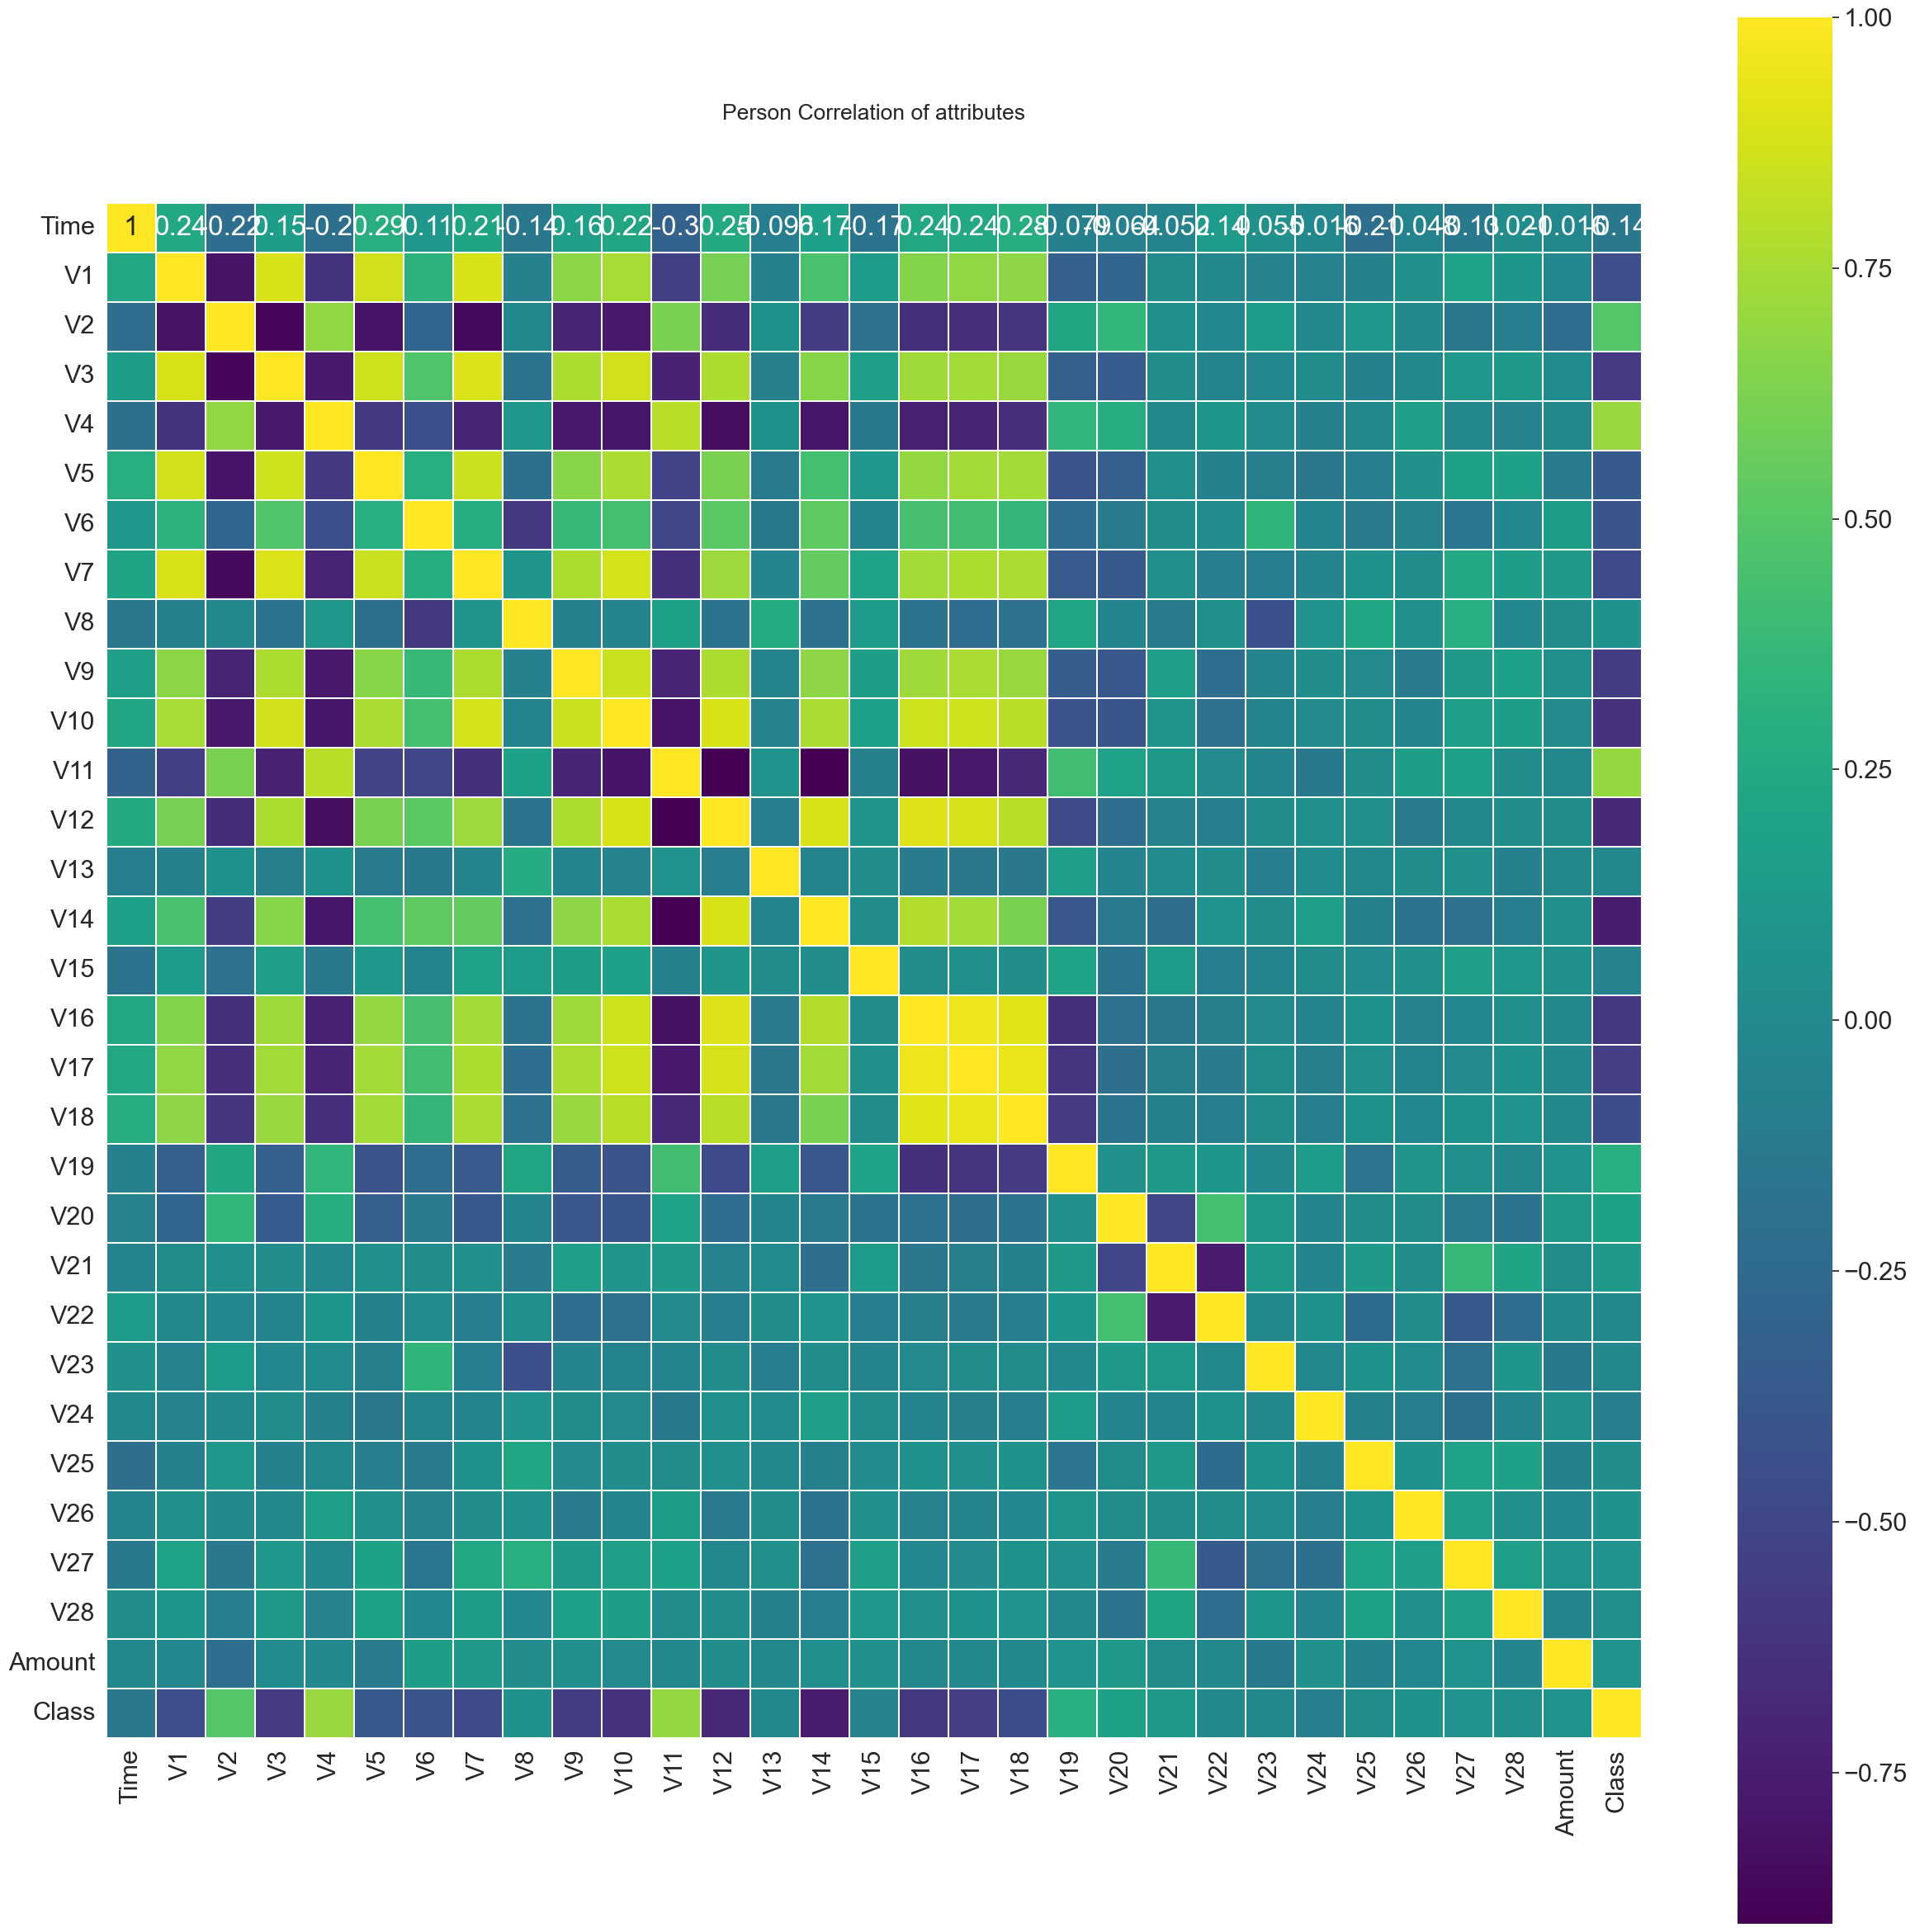

In [307]:
#Creating heat map to identify auto correlation between the variables

colormap = plt.cm.viridis #color range to be used in heatmap
plt.figure(figsize=(30,30))
plt.title('Person Correlation of attributes', y=1.05, size=19)
sns.heatmap(new_dataset.corr(),linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

In [308]:
from scipy import stats

In [309]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [310]:
X_train_scaled

array([[3.91689580e-01, 9.06477007e-01, 4.28845121e-01, ...,
        7.18709161e-01, 1.49174262e-01, 2.58275435e-01],
       [3.53376363e-01, 9.24843727e-01, 4.42350087e-01, ...,
        7.05904982e-01, 1.54435635e-01, 2.69536707e-02],
       [9.75137478e-01, 9.26116743e-01, 4.55115704e-01, ...,
        7.43614993e-01, 1.89300477e-01, 9.30066279e-02],
       ...,
       [8.33744990e-01, 8.68503281e-01, 5.27663029e-01, ...,
        7.51208462e-01, 1.55538028e-01, 4.70395650e-04],
       [2.38960994e-01, 4.72541396e-01, 6.44446491e-01, ...,
        5.77034407e-01, 9.89205675e-02, 1.60498996e-02],
       [3.47015099e-01, 9.60019353e-01, 4.15018160e-01, ...,
        7.11603863e-01, 1.61454946e-01, 2.34257034e-02]])

In [311]:
from sklearn.svm import SVC

In [312]:
svc = SVC()

In [313]:
svc.fit(X_train_scaled, Y_train)

SVC()

In [314]:
print ("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, Y_train)))
print ("Accuracy on testing set: {:.3f}".format(
    svc.score(X_test_scaled, Y_test)))

Accuracy on training set: 0.940
Accuracy on testing set: 0.914


In [315]:
SV_result_train = svc.score(X_train_scaled, Y_train)

In [316]:
SV_result_test = svc.score(X_test_scaled, Y_test)

In [317]:
SV_result_train

0.940279542566709

In [318]:
SV_result_test

0.9137055837563451

In [319]:
###############################--------------- Neural Network CNN --------------###############################

In [320]:
#Variance is high, so we need to standardise

In [321]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [322]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [323]:
#CNN needs 3 Dimentional format
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [324]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [325]:
#Building Neural Network CNN

In [326]:
epochs = 50
model = Sequential()
model.add(Conv1D(32,2, activation = 'relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [327]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 28, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,457 (466.63 KB)

 Trainable params: 119,265 (465.88 KB)

 Non-trainable params: 192 (768.00 B)

In [328]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics =['accuracy'])

In [329]:
history = model.fit(X_train, Y_train, epochs=epochs, validation_data = (X_train, Y_train), verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5774 - loss: 0.9719 - val_accuracy: 0.8488 - val_loss: 0.6123
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8023 - loss: 0.5935 - val_accuracy: 0.8704 - val_loss: 0.5533
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8311 - loss: 0.4713 - val_accuracy: 0.9136 - val_loss: 0.5169
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8528 - loss: 0.4171 - val_accuracy: 0.9377 - val_loss: 0.4802
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8723 - loss: 0.3663 - val_accuracy: 0.9416 - val_loss: 0.4447
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8733 - loss: 0.3516 - val_accuracy: 0.9441 - val_loss: 0.4106
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8923 - loss: 0.2984 - val_accuracy: 0.9377 - val_loss: 0.3862
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9106 - loss: 0.2894 - val_accuracy: 0.9377 - val_los

In [330]:
#Ploting learning curve and confusion matrix

In [331]:
def plot_learningCurve(history, epoch):
    #Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    #Plot training & validation accuracy values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

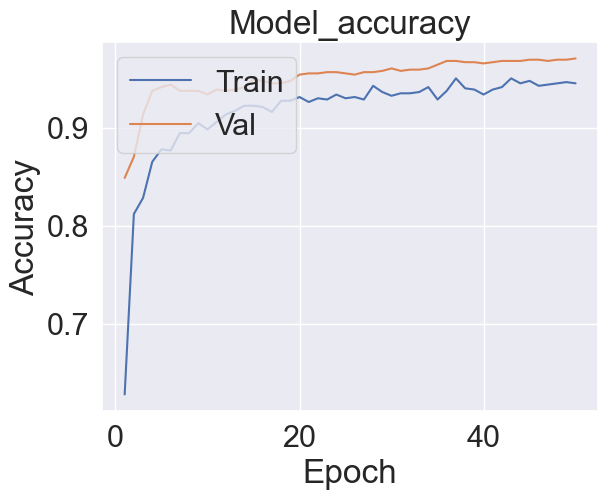

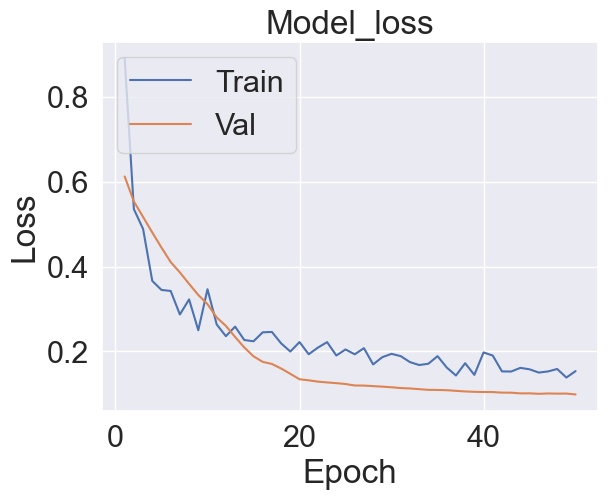

In [332]:
plot_learningCurve(history, epochs)

In [333]:
###############################--------------- Method Comparison --------------###############################

In [334]:
train_error=[training_data_accuracy_LR, accuracy_RF, accuracy_DT, SV_result_train, ]
test_error=[test_data_accuracy_LR, accuracy_RF, accuracy_DT, SV_result_test, ]

col={'Train Error':train_error,'Test Error':test_error}
models=['Logistic Regression','Randon Forest','Decision Tree','SVM']
df=DataFrame(data=col,index=models)
df

,Train Error,Test Error
Logistic Regression,0.921220,0.903553
Randon Forest,0.888325,0.888325
Decision Tree,0.847716,0.847716
SVM,0.940280,0.913706


<Axes: >

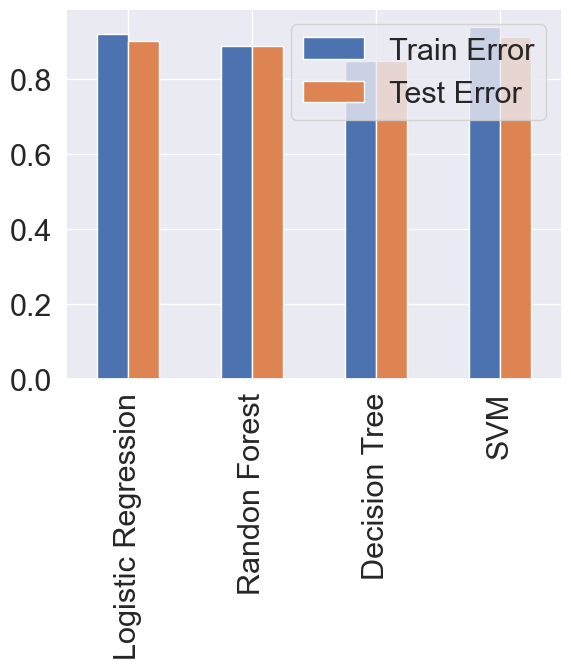

In [335]:
df.plot(kind='bar')